In [1]:
import pandas as pd

## Импортируем файл

In [492]:
df = pd.read_csv("olimpic_medals.csv")
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


## Сколько медалей выиграл Jesse Owens в 1936?

In [355]:
value_counts = df[df.Edition == 1936]['Athlete'].value_counts()
value_counts['OWENS, Jesse']

4

## Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? 

In [356]:
value_counts = df[(df.Sport == 'Badminton') & (df.Gender == 'Men') & (df.Medal == 'Gold')]
value_counts['City'].value_counts()

Atlanta      4
Sydney       4
Athens       4
Beijing      4
Barcelona    3
Name: City, dtype: int64

## Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)?

In [357]:
value_counts = df[(df.Edition >= 1984) & (df.Edition <= 2008)]
value_counts['NOC'].value_counts()

USA    1837
AUS     762
GER     691
CHN     679
RUS     638
       ... 
ISV       1
AHO       1
DJI       1
SEN       1
AFG       1
Name: NOC, Length: 124, dtype: int64

## Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

In [420]:
for_view = df[(df.Event_gender == 'M') & (df.Medal == 'Gold') & (df.Event == '100m')].sort_values("Edition", ascending=False)
for_view.loc[:,['City', 'Edition', 'Athlete', 'NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


## Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом?

In [359]:
print('Всего медалей разыграно: ', len(df.index))

gender = df.Gender.value_counts()
gender

Всего медалей разыграно:  29216


Men      21721
Women     7495
Name: Gender, dtype: int64

## Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

In [98]:
import matplotlib

<AxesSubplot:xlabel='Edition'>

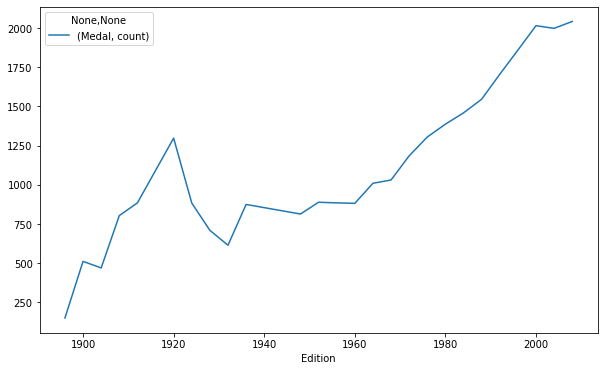

In [360]:
df.groupby('Edition').agg({'Medal': ['count']}).plot(figsize=(10, 6))

## Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [144]:
df.groupby('NOC').agg({'Medal': ['count'], 'Edition': ['min', 'max']})

Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

## Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

In [361]:
df[(df.City == 'Beijing') & (df.Event.isin(['100m','200m']))]['Athlete']

27551                 DIX, Walter
27552                 BOLT, Usain
27553           THOMPSON, Richard
27554          FRASER, Shelly-ann
27555            SIMPSON, Sherone
27556             STEWART, Kerron
27569                 DIX, Walter
27570                 BOLT, Usain
27571             CRAWFORD, Shawn
27572             STEWART, Kerron
27573    CAMPBELL-BROWN, Veronica
27574              FELIX, Allyson
Name: Athlete, dtype: object

## Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике.

<AxesSubplot:xlabel='Edition'>

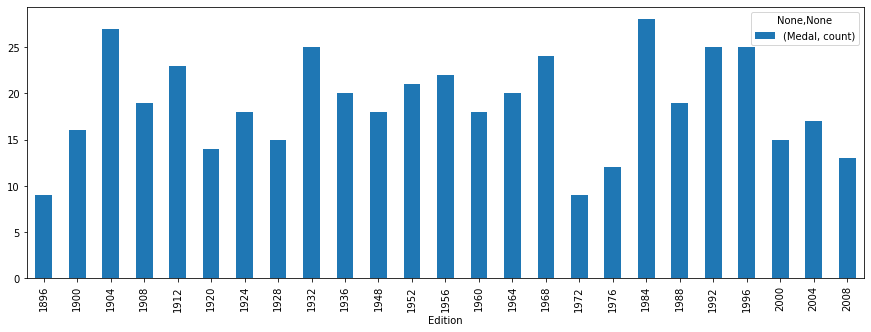

In [421]:
usa = df[(df.NOC == 'USA') & (df.Medal == 'Gold') & (df.Sport == 'Athletics')]
usa.groupby('Edition').agg({'Medal': ['count']}).plot.bar(figsize=(15, 5))

## Постройте график 5 атлетов которые выйграли большинство золотых медалей.

<AxesSubplot:>

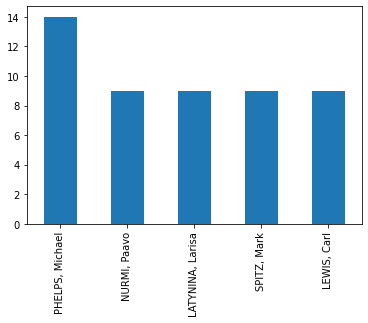

In [422]:
gold_meals = df[(df.Medal == 'Gold')]
gold_meals['Athlete'].value_counts().head(5).plot.bar()


## Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх.

In [429]:
df[df.Edition == 2008].groupby('NOC').agg({'Medal': ['count']})

,Medal
,count
NOC,
AFG,1
ALG,2
ARG,51
ARM,6
AUS,149
...,...
USA,315
UZB,6


## Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

# нужна пощь, не смог решить

In [493]:
df = df[df.NOC == 'USA']

for value_year, group_year in df.groupby('Edition'):
    #print(value_year)
    a = str(group_year['Athlete'].value_counts().head(1))
    group_year = group_year.loc[:,['Edition', 'Athlete', 'Discipline']]
    group_year = group_year[group_year.Athlete == a.split('    ')[0]].head(1)
    print(group_year)

    Edition          Athlete Discipline
27     1896  GARRETT, Robert  Athletics
     Edition                    Athlete Discipline
232     1900  TEWKSBURY, Walter B. John  Athletics
     Edition       Athlete   Discipline
964     1904  HEIDA, Anton  Artistic G.
      Edition           Athlete Discipline
1243     1908  SHERIDAN, Martin  Athletics
      Edition                Athlete Discipline
2682     1912  OSBURN, Carl Townsend   Shooting
      Edition                 Athlete Discipline
3841     1920  SPOONER, Lloyd Spencer   Shooting
      Edition              Athlete Discipline
4142     1924  WEISSMULLER, Johnny   Swimming
      Edition                  Athlete Discipline
5004     1928  GALITZEN, Michael Riley     Diving
      Edition             Athlete Discipline
5875     1932  DIDRIKSON, Mildred  Athletics
      Edition       Athlete Discipline
6427     1936  OWENS, Jesse  Athletics
      Edition               Athlete Discipline
7570     1948  HENRY, Frank Sherman   Dressage
    